# Principal component analysis (PCA)

## Introduction

Principal component analysis (PCA) reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of uncorrelated variables, called principal components.

Let $X$ the matrix $(n,p)$ of data, we note $X_c$ = the centered matrix. Then the empirical variances, covariances matrix is $C = \frac{1}{n}X_c^TX_c$. We note $\Lambda$ the vector of the eigen value (in decrease order) of the matrix $C$ and $U$ the $(p,p)$ orthogonal matrix of the eigen vectors : 
$$C=U\texttt{diag}(\Lambda) U^T.$$
Then We have

* The coordinates of the $n$ observations in the new basis of the eigen vectors $(\vec{u}_1,\ldots,\vec{u}_p)$ are 
$$\Psi = X_cU$$
* The The coordinates of the $p$ variables in the new basis of the eigen vectors $(\vec{v}_1,\ldots,\vec{v}_p)$ are 
$$\Phi = \sqrt{n}U\texttt{diag}(\sqrt{\lambda_1},\ldots,\sqrt{\lambda}_p)$$
* The total inertia (variance) is 
$$I = \texttt{trace}(C)=\sum_{i=1,p}\lambda_i$$
- The variance of the variable $v_i$ is $\lambda_i$

## Iris Data


In [ ]:
using Plots
using Statistics, LinearAlgebra
using RDatasets, DataFrames
iris = RDatasets.dataset("datasets", "iris")  # Iris Datas
Names = names(iris)
X = Matrix(iris[:,1:4])
p1 = scatter(X[:,1],X[:,2], c=[:blue :red :green], group=iris.Species,xlabel = Names[1],ylabel=Names[2])
p2 = scatter(X[:,3],X[:,4], c=[:blue :red :green], group=iris.Species,xlabel = Names[3],ylabel=Names[4])
plot(p1,p2)

(150, 4)

### My PCA function


In [ ]:
using LinearAlgebra, Statistics
function my_PCA(X::Matrix{<:Real})::Tuple{Vector{<:Real},Matrix{<:Real},Matrix{<:Real},Matrix{<:Real},Real,Vector{<:Real}}
"""
    Compute the PCA of Data
    Input
    X : (n,p) Matrix of reals
         n = number of observations
         p = number of variables
    Output
        Λ : Vector of the p eigen value in decrease order
        U : (p,p) Matrix of reals
            eigen vectors in column
        Ψ : (n,p) Matrix of reals
            Coordinates of the observation in the new basis
        Φ = (p,p) Matrix of reals
             Coordinates of the variables in the new basis
        I_total : Real
             total inertia
        cum_var_ratio : p vector of reals
             cumulative variance ratio
"""
     n,p = size(X)
     Λ = zeros(p); U = zeros(p,p); Ψ = zeros(n,p); Φ = zeros(p,p); I_total=0; cum_var_ratio = zeros(p)
    return Λ, U, Ψ, Φ, I_total,cum_var_ratio
end


my_PCA (generic function with 1 method)


### Print results


In [24]:

my_PCA_results = my_PCA(X)
my_Λ, my_U, my_Ψ, my_Φ, my_I_total, my_cum_var_ratio = my_PCA_results
println("lambda = ", my_Λ)
println("my_U = ")
display(my_U)
println("my_Ψ = ")
display(my_Ψ)
println("my_Φ = ")
display(my_Φ)
println("Total inertia = ", my_I_total)
println("my_cum_var_ratio = ", my_cum_var_ratio)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

150×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 ⋮              
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

(150, 4)
lambda = [0.0, 0.0, 0.0, 0.0]
my_U = 
my_Ψ = 
my_Φ = 
Total inertia = 0
my_cum_var_ratio = [0.0, 0.0, 0.0, 0.0]



### Graph of the observations


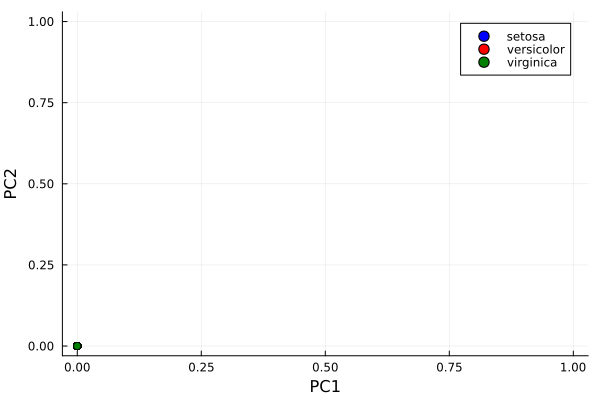

In [ ]:
p3 = scatter(my_Ψ[:,1],my_Ψ[:,2], c=[:blue :red :green], group=iris.Species,xlabel = "PC1", ylabel="PC2")
p4 = scatter(my_Ψ[:,3],my_Ψ[:,4], c=[:blue :red :green], group=iris.Species,xlabel = "PC1", ylabel="PC2")
plot(p3,p4)


### Graph of the variables


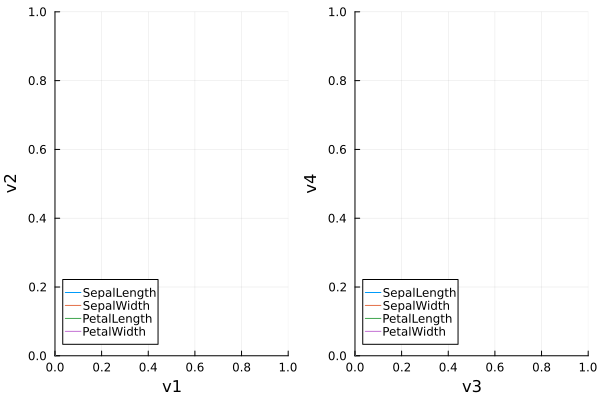

In [11]:

pvar1 = plot()
ech = 1.1*maximum(abs.(my_Φ))
for i=1:4
    plot!(pvar1,[0,my_Φ[i,1]], [0,my_Φ[i,2]], xlims=(-ech,ech), ylims=(-ech,ech), arrow=true, label=Names[i], legend=:bottomleft, xlabel="v1", ylabel="v2")
end

pvar2 = plot()
for i=1:4
    plot!(pvar2,[0,my_Φ[i,3]], [0,my_Φ[i,4]], xlims=(-ech,ech), ylims=(-ech,ech), arrow=true, label=Names[i], legend=:bottomleft, xlabel="v3", ylabel="v4")
end
plot(pvar1,pvar2)


### With MultivariateStats package

Use the MultivariateStats package for obtaining the same results


## Normed PCA

### Introduction

* $X$ the matrix $(n,p)$ of data
* $X_c$ is the centered matrix
* $Y$ is the centered and normed matrix. Each column of $Xc$ is divided by its sample standard deviation
* $R=Y^TY$ is the corretalion matrix of the Data $X$.
* $$C=U\texttt{diag}(\Lambda) U^T.$$
Then We have

* The coordinates of the $n$ observations in the new basis of the eigen vectors $(\vec{u}_1,\ldots,\vec{u}_p)$ are 
$$\Psi = YU$$
* The The coordinates of the $p$ variables in the new basis of the eigen vectors $(\vec{v}_1,\ldots,\vec{v}_p)$ are 
$$\Phi = U\texttt{diag}(\sqrt{\lambda_1},\ldots,\sqrt{\lambda}_p)$$
* The total inertia (variance) is 
$$I = \texttt{trace}(C)=\sum_{i=1,p}\lambda_i$$
- The variance of the variable $v_i$ is $\lambda_i$


### Data


In [13]:

# Data from Tomassone page 138 : mineral waters
X =[341   27   3   84   23   2  
263   23   9   91   5   3  
287   3   5   44   24   23  
   298   9   23   96   6   11 
    200   15   8   70   2   4 
    250   5   20   71   6   11 
   357   10   2   78   24   5 
      311   14   18   73   18   13 
    256   6   23   86   3   18  
   186   10   16   64   4   9 
    183   16   44   48   11   31 
       398   218   15   157   35   8 
      348   51   31   140   4   14 
   168   24   8   55   5   9 
   110   65   5   4   1   3 
   332   14   8   103   16   5 
      196   18   6   58   6   13 
       59   7   6   16   2   9 
       402   306   15   202   36   3 
       64   7   8   10   6   8 ]

df = DataFrame(X,[:HCO3, :SO4, :Cl, :Ca, :Mg, :Na])
df[:, :Origins] = ["Aix-les-Bains", "Beckerish",
"Cayranne", 
"Chambon",
"Cristal-Roc",
"St Cyr",
"Evian",
"Ferita",
"St Hyppolite",
"Laurier", 
"Ogeu",
"Ondine",
"Perrier",
"Ribes", 
"Spa",
"Thonon", 
"Veri", 
"Viladreau",
"Vittel", 
"Volvic"]

20-element Vector{String}:
 "Aix-les-Bains"
 "Beckerish"
 "Cayranne"
 "Chambon"
 "Cristal-Roc"
 "St Cyr"
 "Evian"
 "Ferita"
 "St Hyppolite"
 "Laurier"
 "Ogeu"
 "Ondine"
 "Perrier"
 "Ribes"
 "Spa"
 "Thonon"
 "Veri"
 "Viladreau"
 "Vittel"
 "Volvic"